In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
##dataset loading...
print("[INFO] loading data...")
dataset = load_iris()

[INFO] loading data...


In [3]:
##instantiate the Logistic model
lr = LogisticRegression()

In [4]:
# train-test split
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, random_state=1, test_size=0.20)

In [5]:
#Logistic hyperparameters
p_grid_lr = {"C": [5,10,15,20,25,30]}

In [6]:
# inner CV for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [7]:
#Inner Grid-search ...finding the optimal hyperparameters
clf = GridSearchCV(estimator=lr, param_grid=p_grid_lr, cv=inner_cv, verbose=0)

In [8]:
#find the best hyperparameters and training the model
clf.fit(trainX, trainY)

/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [5, 10, 15, 20, 25, 30]})

In [9]:
#testing the model
predictions = clf.predict(testX)

acc=accuracy_score(testY, predictions)
print("ACCURACY Logistic regression model: {}".format(acc))

ACCURACY Logistic regression model: 0.9666666666666667


The `accuracy_score` function computes the accuracy, either the fraction (default) or the count (`normalize=False`) of correct predictions.

In [10]:
# #classification report
print(classification_report(testY, predictions, target_names=dataset.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [11]:
# #confusion matrix
cm = confusion_matrix(testY, predictions, labels=clf.classes_)

The `confusion_matrix` function evaluates classification accuracy by computing the *confusion matrix* with each row corresponding to the true class.

By definition, entry $i,j$ in a confusion matrix is the number of observations actually in group $i$, but predicted to be in group $j$.

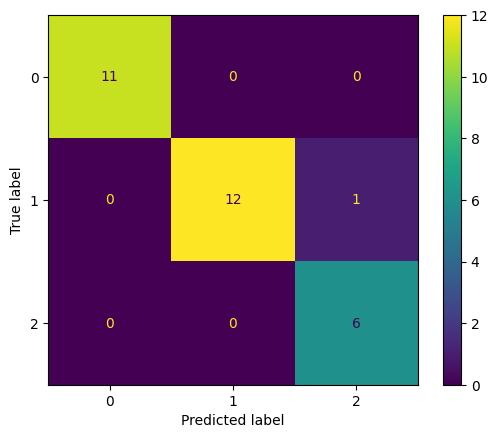

In [14]:
#ConfusionMatrixDisplay can be used to visually represent a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) 
disp.plot()

plt.show()